In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.data.shape

(506, 13)

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
x = boston.data
y = boston.target

columns = boston.feature_names

In [6]:
boston_df = pd.DataFrame(boston.data, columns = columns)

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


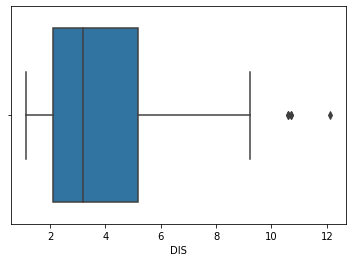

In [8]:
# Boxplot
import seaborn as sns

sns.boxplot(x=boston_df['DIS'])

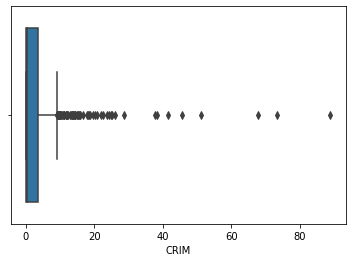

In [9]:
sns.boxplot(x=boston_df['CRIM'])

In [10]:
# Outlier removal

from scipy.stats import zscore

z = np.abs(zscore(boston_df))
print(z[0])

[0.41978194 0.28482986 1.2879095  0.27259857 0.14421743 0.41367189
 0.12001342 0.1402136  0.98284286 0.66660821 1.45900038 0.44105193
 1.0755623 ]


In [12]:
threshold = 3
print(np.where(z > threshold))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [13]:
z[55][1]

3.375038763517309

In [14]:
boston_df.shape

(506, 13)

In [15]:
boston_df = boston_df[(z < 3).all(axis=1)]
boston_df.shape

(415, 13)

In [34]:
boston_df1 = pd.DataFrame(boston.data, columns = columns)

In [32]:
# IQR

# Outlier removal based on Q1-1.5*IQR to Q3-1.5*IQR
# df.quantile(0.25)
# df.quantile(0.75)


def outlier_detection(df):
  for column in df.columns:
    iqr = df[column].quantile(.75) - df[column].quantile(.25) 
    print(df[column].quantile(.25))
    print(df[column].quantile(.75))
    print(f'iqr = {iqr}')

In [35]:
outlier_detection(boston_df1)

0.08204499999999999
3.6770825
iqr = 3.5950375
0.0
12.5
iqr = 12.5
5.19
18.1
iqr = 12.91
0.0
0.0
iqr = 0.0
0.449
0.624
iqr = 0.175
5.8855
6.6235
iqr = 0.7379999999999995
45.025
94.07499999999999
iqr = 49.04999999999999
2.100175
5.1884250000000005
iqr = 3.0882500000000004
4.0
24.0
iqr = 20.0
279.0
666.0
iqr = 387.0
17.4
20.2
iqr = 2.8000000000000007
375.3775
396.225
iqr = 20.847500000000025
6.949999999999999
16.955000000000002
iqr = 10.005000000000003


In [36]:
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])